1.数据准备

In [28]:
import requests
from lxml import etree
import json
import re
import openpyxl

In [29]:
url = "https://voice.baidu.com/act/newpneumonia/newpneumonia/"
response = requests.get(url)
#print(response.text)

html = etree.HTML(response.text)
result = html.xpath('//script[@type="application/json"]/text()')
#print(type(result))
#print(result[0])

result = result[0]
result = json.loads(result)
print(type(result))
result_in = result['component'][0]['caseList']
result_out = result['component'][0]['globalList']
#print(result_out)
for each in result_in:
    print(each)
    print("\n" + '*' * 20)

#result = json.dumps(result)
#print(result)

<class 'dict'>
{'confirmed': '1', 'died': '0', 'crued': '1', 'relativeTime': '1606752000', 'confirmedRelative': '0', 'diedRelative': '0', 'curedRelative': '0', 'asymptomaticRelative': '0', 'asymptomatic': '0', 'curConfirm': '0', 'curConfirmRelative': '0', 'icuDisable': '1', 'area': '西藏', 'subList': [{'city': '拉萨', 'confirmed': '1', 'died': '0', 'crued': '1', 'confirmedRelative': '0', 'curConfirm': '0', 'cityCode': '100'}]}

********************
{'confirmed': '46', 'died': '0', 'crued': '46', 'relativeTime': '1606752000', 'confirmedRelative': '0', 'diedRelative': '0', 'curedRelative': '0', 'asymptomaticRelative': '', 'curConfirm': '0', 'curConfirmRelative': '0', 'cityCode': '2911', 'icuDisable': '1', 'area': '澳门', 'subList': []}

********************
{'confirmed': '18', 'died': '0', 'crued': '18', 'relativeTime': '1606752000', 'confirmedRelative': '0', 'diedRelative': '0', 'curedRelative': '0', 'asymptomaticRelative': '0', 'asymptomatic': '0', 'curConfirm': '0', 'curConfirmRelative': '0

In [30]:
wb = openpyxl.Workbook()
ws = wb.active
ws.title = "国内疫情"
ws.append(['省份', '累计确诊', '死亡', '治愈', '现有确诊', '累计确诊增量', '死亡增量', '治愈增量', '现有确诊增量'])
for each in result_in:
    temp_list = [each['area'], each['confirmed'], each['died'], each['crued'], each['curConfirm'],
                 each['confirmedRelative'], each['diedRelative'], each['curedRelative'],
                 each['curConfirmRelative']]
    for i in range(len(temp_list)):
        if temp_list[i] == '':
            temp_list[i] = '0'
    ws.append(temp_list)
for each in result_out:
    #print(each)
    #print("\n" + '*' * 50)
    sheet_title = each['area']
    ws_out = wb.create_sheet(sheet_title)
    ws_out.append(['国家', '累计确诊', '死亡', '治愈', '现有确诊', '累计确诊增量'])
    for country in each['subList']:
        list_temp = [country['country'], country['confirmed'], country['died'], country['crued'],
                     country['curConfirm'], country['confirmedRelative']]
        for i in range(len(list_temp)):
            if list_temp[i] == '':
                list_temp[i] = '0'
        ws_out.append(list_temp)
                
wb.save('./data.xlsx')

In [40]:
class Get_data():
    
    def get_data(self):
        url = "https://voice.baidu.com/act/newpneumonia/newpneumonia/"
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) '
                          'Chrome/80.0.3987.149 Safari/537.36 '
        }
        response = requests.get(url,headers=headers)
        with open('html.txt', 'w', encoding='utf-8') as file:
            file.write(response.text)

    def get_time(self):
        with open('html.txt','r', encoding='utf-8') as file:
            text = file.read()
        # 获取更新时间
        time_in = re.findall('"mapLastUpdatedTime":"(.*?)"',text)[0]
        time_out = re.findall('"foreignLastUpdatedTime":"(.*?)"',text)[0]
        print('国内疫情更新时间为 '+time_in)
        print('国外疫情更新时间为 '+time_out)
        return time_in,time_out

    def parse_data(self):
        with open('html.txt','r', encoding='utf-8') as file:
            text = file.read()
        html = etree.HTML(text)
        result = html.xpath('//script[@type="application/json"]/text()')
        result = result[0]
        result = json.loads(result)
        result = json.dumps(result['component'][0]['caseList'])
        with open('data.json','w', encoding='utf-8') as file:
            file.write(result)
            print('数据已写入json文件...')
        response = requests.get("https://voice.baidu.com/act/newpneumonia/newpneumonia/")
        with open('html.txt', 'w', encoding='utf-8') as file:
            file.write(response.text)
        time_in = re.findall('"mapLastUpdatedTime":"(.*?)"', response.text)[0]
        time_out = re.findall('"foreignLastUpdatedTime":"(.*?)"', response.text)[0]
        print(time_in)
        print(time_out)

        html = etree.HTML(response.text)
        result = html.xpath('//script[@type="application/json"]/text()')
        result = result[0]
        result = json.loads(result)

        data_in = result['component'][0]['caseList']
        for each in data_in:
            print(each)
            print("\n" + '*' * 20)

        data_out = result['component'][0]['globalList']
        for each in data_out:
            print(each)
            print("\n" + '*' * 20)

        '''
            area --> 大多为省份
            city --> 城市
            confirmed --> 累计
            died --> 死亡
            crued --> 治愈
            relativeTime --> 
            confirmedRelative --> 累计的增量
            curedRelative --> 治愈的增量
            curConfirm --> 现有确诊
            curConfirmRelative --> 现有确诊的增量
            diedRelative --> 死亡的增量
        '''

        wb = openpyxl.Workbook()
        ws_in = wb.active
        ws_in.title = "国内疫情"
        ws_in.append(['省份', '累计确诊', '死亡', '治愈', '现有确诊', '累计确诊增量', '死亡增量', '治愈增量', '现有确诊增量'])
        for each in data_in:
            temp_list = [each['area'], each['confirmed'], each['died'], each['crued'], each['curConfirm'],
                         each['confirmedRelative'], each['diedRelative'], each['curedRelative'],
                         each['curConfirmRelative']]
            for i in range(len(temp_list)):
                if temp_list[i] == '':
                    temp_list[i] = '0'
            ws_in.append(temp_list)

        for each in data_out:
            print(each)
            print("\n" + '*' * 20)
            sheet_title = each['area']
            ws_out = wb.create_sheet(sheet_title)
            ws_out.append(['国家', '累计确诊', '死亡', '治愈', '现有确诊', '累计确诊增量'])
            for country in each['subList']:
                list_temp = [country['country'], country['confirmed'], country['died'], country['crued'],
                             country['curConfirm'], country['confirmedRelative']]
                for i in range(len(list_temp)):
                    if list_temp[i] == '':
                        list_temp[i] = '0'
                ws_out.append(list_temp)

            wb.save('./data.xlsx')


In [41]:
obj = Get_data()
obj.get_data()

In [42]:
in_date, out_date = obj.get_time()
print(in_date, " -- ", out_date)

国内疫情更新时间为 2020.12.02 21:12
国外疫情更新时间为 2020.12.02 21:12
2020.12.02 21:12  --  2020.12.02 21:12


In [43]:
obj.parse_data()

数据已写入json文件...
2020.12.02 21:13
2020.12.02 21:13
{'confirmed': '1', 'died': '0', 'crued': '1', 'relativeTime': '1606752000', 'confirmedRelative': '0', 'diedRelative': '0', 'curedRelative': '0', 'asymptomaticRelative': '0', 'asymptomatic': '0', 'curConfirm': '0', 'curConfirmRelative': '0', 'icuDisable': '1', 'area': '西藏', 'subList': [{'city': '拉萨', 'confirmed': '1', 'died': '0', 'crued': '1', 'confirmedRelative': '0', 'curConfirm': '0', 'cityCode': '100'}]}

********************
{'confirmed': '46', 'died': '0', 'crued': '46', 'relativeTime': '1606752000', 'confirmedRelative': '0', 'diedRelative': '0', 'curedRelative': '0', 'asymptomaticRelative': '', 'curConfirm': '0', 'curConfirmRelative': '0', 'cityCode': '2911', 'icuDisable': '1', 'area': '澳门', 'subList': []}

********************
{'confirmed': '18', 'died': '0', 'crued': '18', 'relativeTime': '1606752000', 'confirmedRelative': '0', 'diedRelative': '0', 'curedRelative': '0', 'asymptomaticRelative': '0', 'asymptomatic': '0', 'curConfi

{'area': '北美洲', 'subList': [{'died': '0', 'confirmed': '16', 'crued': '14', 'curConfirm': '2', 'confirmedRelative': '0', 'relativeTime': '1606752000', 'country': '圣皮埃尔'}, {'died': '9', 'confirmed': '262', 'crued': '214', 'curConfirm': '39', 'confirmedRelative': '0', 'relativeTime': '1606752000', 'country': '百慕大'}, {'died': '1', 'confirmed': '72', 'crued': '71', 'curConfirm': '0', 'confirmedRelative': '1', 'relativeTime': '1606752000', 'country': '英属维尔京群岛'}, {'died': '0', 'confirmed': '6', 'crued': '3', 'curConfirm': '3', 'confirmedRelative': '0', 'relativeTime': '1606752000', 'country': '安圭拉'}, {'died': '0', 'confirmed': '41', 'crued': '30', 'curConfirm': '11', 'confirmedRelative': '0', 'relativeTime': '1606752000', 'country': '格林纳达'}, {'died': '0', 'confirmed': '22', 'crued': '19', 'curConfirm': '3', 'confirmedRelative': '0', 'relativeTime': '1606752000', 'country': '圣基茨和尼维斯'}, {'died': '6', 'confirmed': '750', 'crued': '720', 'curConfirm': '24', 'confirmedRelative': '0', 'relativeTim

{'area': '热门', 'subList': [{'died': '13936', 'confirmed': '668957', 'crued': '409320', 'curConfirm': '245701', 'confirmedRelative': '30110', 'relativeTime': '1606752000', 'country': '土耳其'}, {'died': '48990', 'confirmed': '989572', 'crued': '688054', 'curConfirm': '252528', 'confirmedRelative': '13881', 'relativeTime': '1606752000', 'country': '伊朗'}, {'died': '9438', 'confirmed': '527523', 'crued': '7017', 'curConfirm': '511068', 'confirmedRelative': '4045', 'relativeTime': '1606752000', 'country': '荷兰'}, {'died': '16786', 'confirmed': '579212', 'crued': '37924', 'curConfirm': '524502', 'confirmedRelative': '0', 'relativeTime': '1606752000', 'country': '比利时'}, {'died': '45511', 'confirmed': '1673202', 'crued': '196958', 'curConfirm': '1430733', 'confirmedRelative': '0', 'relativeTime': '1606752000', 'country': '西班牙'}, {'died': '59051', 'confirmed': '1643086', 'crued': '3589', 'curConfirm': '1580446', 'confirmedRelative': '0', 'relativeTime': '1606752000', 'country': '英国'}, {'confirmed':

2.绘制词云

In [146]:
import openpyxl
import wordcloud
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

wb = openpyxl.load_workbook('data.xlsx')
sheet_names = wb.sheetnames

frequency_out = {}
for each in sheet_names:
    if '洲' in each:
        ws = wb[each]
        for row in ws.values:
            if row[1] == "累计确诊":
                pass
            else:
                frequency_out[row[0]] = float(row[1])
    else:
        pass

frequency_in = {}
ws = wb['国内疫情']
for row in ws.values:
    if row[1] == "累计确诊":
        pass
    else:
        frequency_in[row[0]] = float(row[1])

def generate_pic(frequency,name):
    #background_image = np.array(Image.open('.\Image\Python_image.jpg'))
    wc = wordcloud.WordCloud(font_path=r'C:\Windows\Fonts\simhei.ttf',
                          background_color = "red",
                          #mask=background_image,
                          width=1920, height=1080)
    wc.generate_from_frequencies(frequency)
    wc.to_file('%s.png'%(name))

    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [148]:
frequency_in

{'西藏': 1.0,
 '澳门': 46.0,
 '青海': 18.0,
 '台湾': 685.0,
 '香港': 6499.0,
 '贵州': 147.0,
 '吉林': 157.0,
 '新疆': 980.0,
 '宁夏': 75.0,
 '内蒙古': 329.0,
 '甘肃': 182.0,
 '天津': 300.0,
 '山西': 221.0,
 '辽宁': 289.0,
 '黑龙江': 949.0,
 '海南': 171.0,
 '河北': 373.0,
 '陕西': 500.0,
 '云南': 219.0,
 '广西': 263.0,
 '福建': 490.0,
 '上海': 1333.0,
 '北京': 951.0,
 '江苏': 680.0,
 '四川': 808.0,
 '山东': 854.0,
 '江西': 935.0,
 '重庆': 590.0,
 '安徽': 992.0,
 '湖南': 1020.0,
 '河南': 1290.0,
 '广东': 1992.0,
 '浙江': 1294.0,
 '湖北': 68148.0}

In [149]:
frequency_out

{'塔吉克斯坦': 12231.0,
 '阿拉伯联合酋长国': 171434.0,
 '也门': 2197.0,
 '老挝': 39.0,
 '缅甸': 92189.0,
 '叙利亚': 7973.0,
 '东帝汶': 30.0,
 '吉尔吉斯斯坦': 73513.0,
 '乌兹别克斯坦': 73335.0,
 '哈萨克斯坦': 133118.0,
 '土耳其': 668957.0,
 '蒙古国': 812.0,
 '塞浦路斯': 10883.0,
 '文莱': 151.0,
 '孟加拉国': 469423.0,
 '马尔代夫': 13049.0,
 '不丹': 414.0,
 '巴勒斯坦': 90192.0,
 '沙特阿拉伯': 357872.0,
 '约旦': 223617.0,
 '印度尼西亚': 549508.0,
 '亚美尼亚': 137231.0,
 '卡塔尔': 139256.0,
 '阿塞拜疆': 129544.0,
 '格鲁吉亚': 143376.0,
 '巴基斯坦': 403311.0,
 '阿曼': 124145.0,
 '阿富汗': 46980.0,
 '巴林': 87137.0,
 '科威特': 143260.0,
 '伊拉克': 554767.0,
 '黎巴嫩': 129455.0,
 '以色列': 338748.0,
 '伊朗': 989572.0,
 '印度': 9504803.0,
 '菲律宾': 434357.0,
 '斯里兰卡': 24532.0,
 '柬埔寨': 329.0,
 '尼泊尔': 236246.0,
 '越南': 1358.0,
 '韩国': 35163.0,
 '马来西亚': 68020.0,
 '日本': 153450.0,
 '新加坡': 58230.0,
 '泰国': 4026.0,
 '海峡群岛': 1341.0,
 '马恩岛': 369.0,
 '黑山': 35849.0,
 '法罗群岛': 503.0,
 '阿尔巴尼亚': 39014.0,
 '保加利亚': 148775.0,
 '摩尔多瓦': 108863.0,
 '马耳他': 10101.0,
 '斯洛伐克': 109226.0,
 '梵蒂冈': 27.0,
 '塞尔维亚': 183437.0,
 '直布罗陀': 1030.0,
 '列支敦士登'

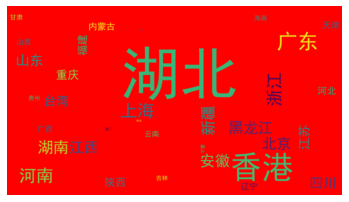

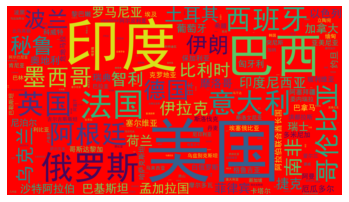

In [150]:
generate_pic(frequency_in,'国内疫情')
generate_pic(frequency_out,'国外疫情')

In [154]:
import wordcloud
txt = 'test python'
wc = wordcloud.WordCloud()
wc.generate(txt)
wc.to_file('ENWordCloud.png')

In [155]:
import wordcloud
wc = wordcloud.WordCloud(font_path=r'C:\Windows\Fonts\simhei.ttf', 
                         background_color = "red", 
                         width=1920, height=1080)
wc.generate_from_frequencies(frequency_in)
wc.to_file('CNWordCloud.png')